<a href="https://colab.research.google.com/github/sepaharvey/Fantasy-Football-Python-Refresh/blob/main/Section_6_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Read more about pd.set_option here:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html
"""

import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt




In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:,1:]

df.head()


,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7


In [3]:
"""
View the documentation for the info method here
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html
"""
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         650 non-null    object 
 1   Tm             650 non-null    object 
 2   Pos            578 non-null    object 
 3   Age            650 non-null    int64  
 4   G              650 non-null    int64  
 5   GS             650 non-null    int64  
 6   Tgt            650 non-null    int64  
 7   Rec            650 non-null    int64  
 8   PassingYds     650 non-null    int64  
 9   PassingTD      650 non-null    int64  
 10  PassingAtt     650 non-null    int64  
 11  PassingCmp     650 non-null    int64  
 12  RushingYds     650 non-null    int64  
 13  RushingTD      650 non-null    int64  
 14  RushingAtt     650 non-null    int64  
 15  ReceivingYds   650 non-null    int64  
 16  ReceivingTD    650 non-null    int64  
 17  Int            650 non-null    int64  
 18  Fumbles   

In [4]:
pd.set_option('chained_assignment', None) # we don't care about overriding the original df

# you could also do rb_df = df.loc[df['Pos'] == 'RB'].copy()
rb_df = df.loc[df['Pos'] == 'RB']

# Usage is defined as Tgt + RushingAtt
rb_df['Usage/G'] = (rb_df['Tgt'] + rb_df['RushingAtt']) / rb_df['G']

rb_df['FantasyPoints/G'] = rb_df['FantasyPoints'] / rb_df['G']

"""
Here, we're just looking at the last column of our DataFrame here.
"""

rb_df.iloc[:, -1:].head()

,FantasyPoints/G
1,19.311765
2,20.964706
3,18.925000
5,21.923529
9,16.552941


In [5]:
rb_columns = ['Player', 'RushingAtt', 'RushingYds', 'RushingTD']


rb_df_ex = df.loc[df['Pos'] == 'RB', rb_columns]

rb_df_ex[:1]

,Player,RushingAtt,RushingYds,RushingTD
1,Josh Jacobs*+,340,1653,12


<Axes: xlabel='RushingAtt', ylabel='Tgt'>

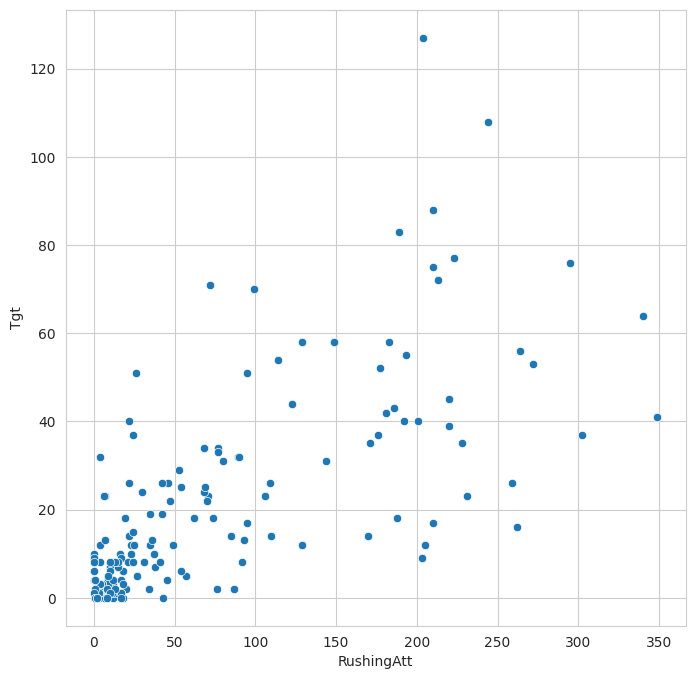

In [6]:
sns.set_style('whitegrid')

"""
seaborn documentation for scatter plots:
https://seaborn.pydata.org/generated/seaborn.scatterplot.html
"""


plt.figure(figsize = (8, 8))


sns.scatterplot(x=rb_df['RushingAtt'], y = rb_df['Tgt'])

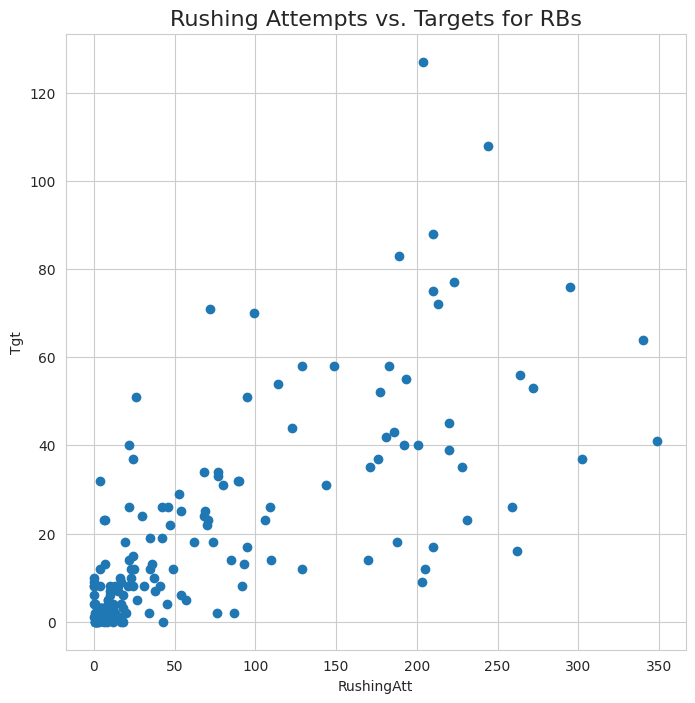

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(rb_df['RushingAtt'], rb_df['Tgt'])
plt.xlabel('RushingAtt')
plt.ylabel('Tgt')
plt.title('Rushing Attempts vs. Targets for RBs', fontsize=16)
plt.show()

<Axes: xlabel='Usage/G', ylabel='FantasyPoints/G'>

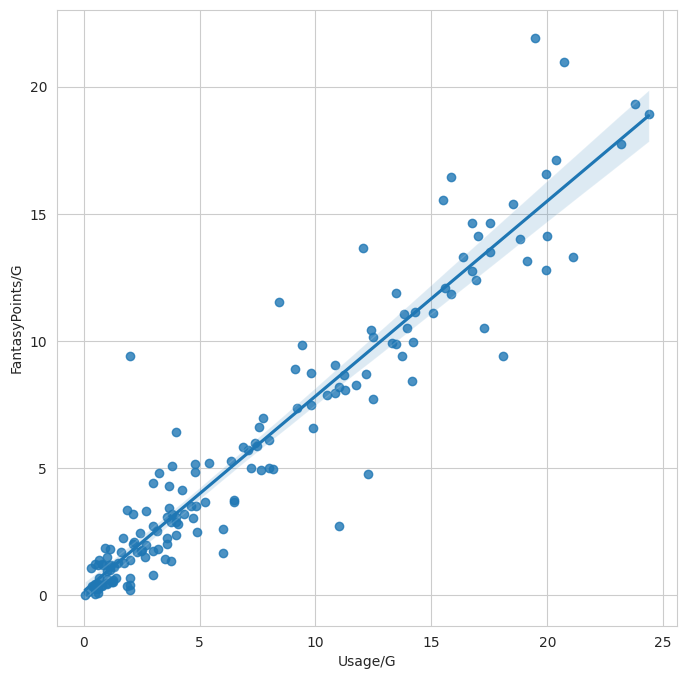

In [8]:
"""
documentation for sns.regplot

https://seaborn.pydata.org/generated/seaborn.regplot.html
"""


plt.figure(figsize=(8, 8))
sns.regplot(x=rb_df['Usage/G'], y = rb_df['FantasyPoints/G'])

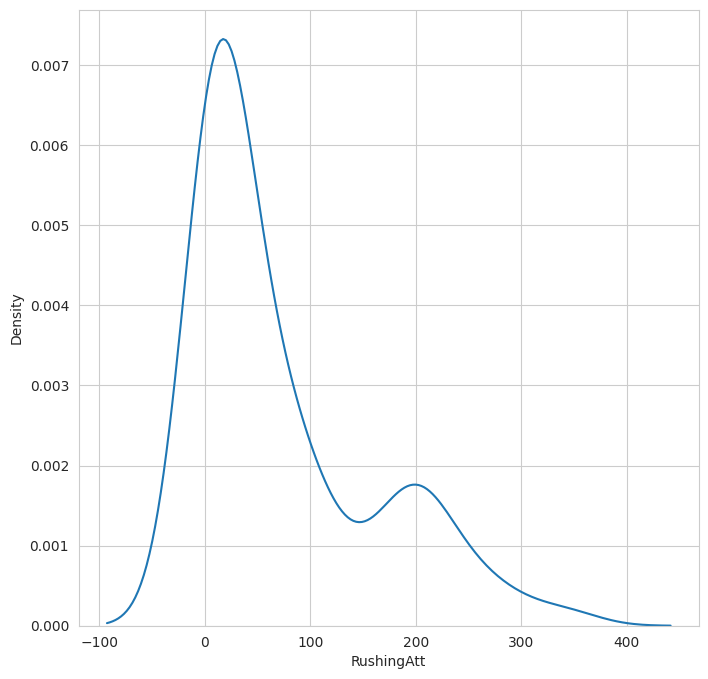

In [9]:
# kernel density restimation for RB rushing attempts
# https://seaborn.pydata.org/generated/seaborn.kdeplot.html#seaborn.kdeplot
plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['RushingAtt']);

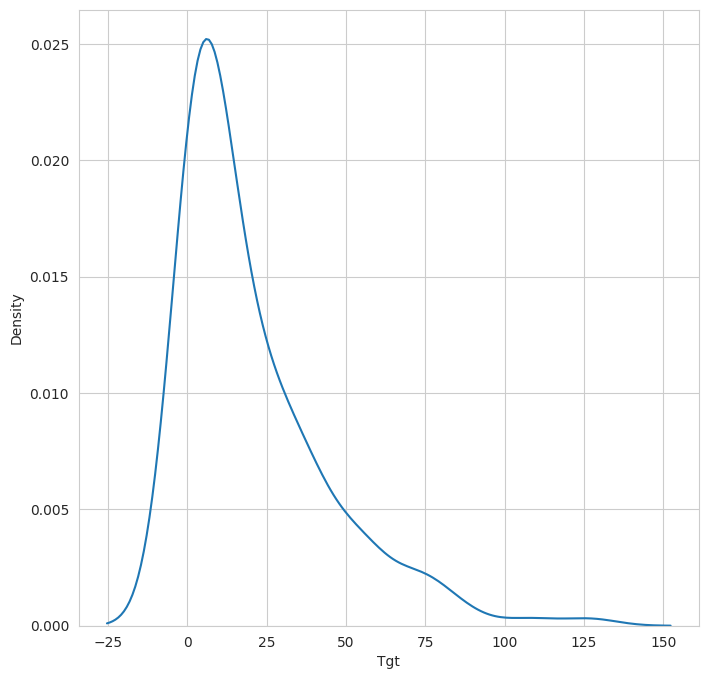

In [10]:
plt.figure(figsize=(8, 8))
sns.kdeplot(rb_df['Tgt']);


<Figure size 800x800 with 0 Axes>

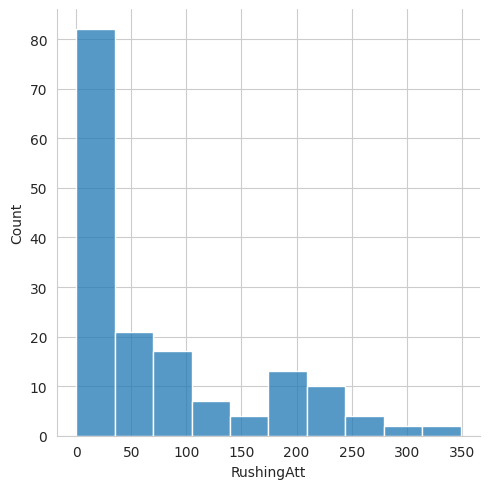

In [11]:
plt.figure(figsize=(8, 8))
sns.displot(rb_df['RushingAtt']);

<Figure size 800x800 with 0 Axes>

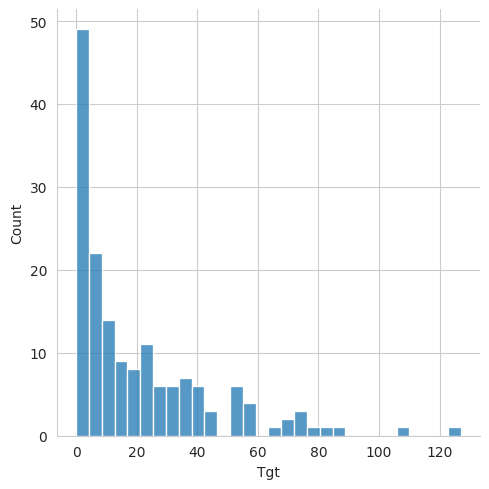

In [12]:
plt.figure(figsize = (8,8))

sns.displot(rb_df["Tgt"], bins = 30)

<Axes: xlabel='RushingAtt', ylabel='Count'>

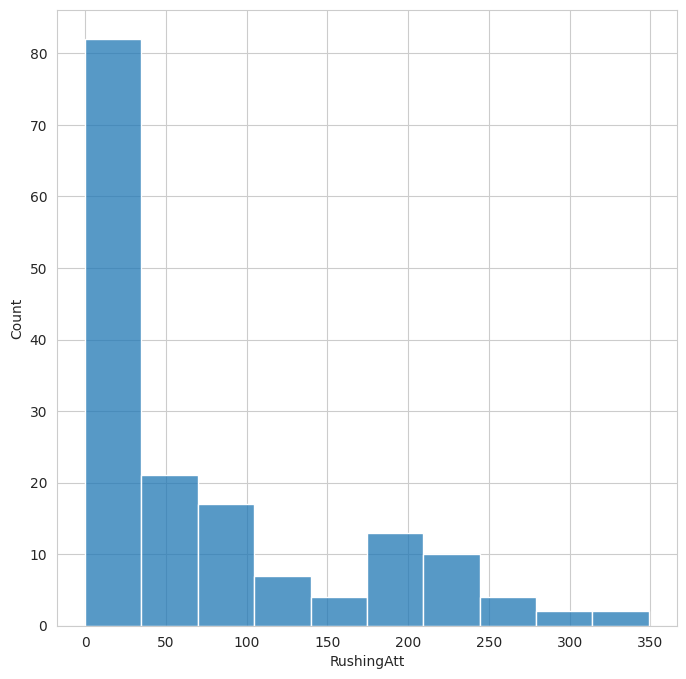

In [13]:
plt.figure(figsize = (8,8))

sns.histplot(rb_df['RushingAtt'])



<Axes: xlabel='RushingAtt', ylabel='Tgt'>

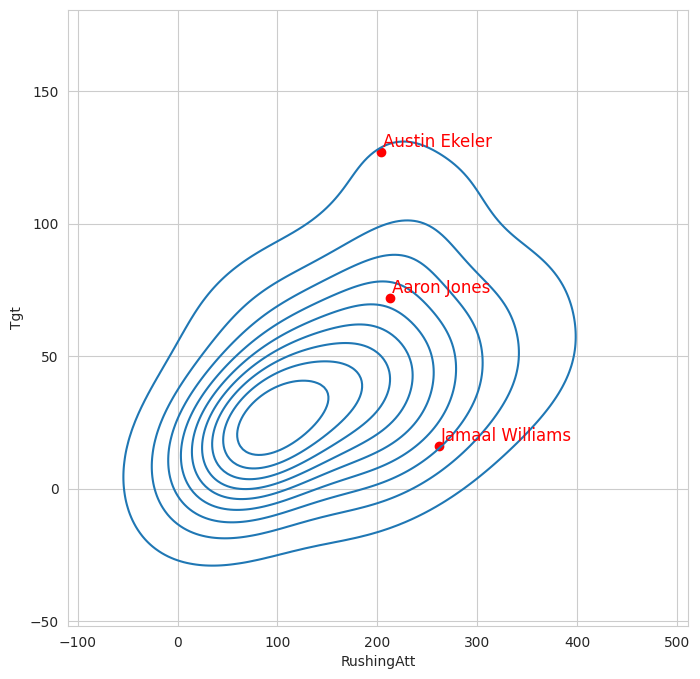

In [34]:
"""
Here, we use the object-oriented API for matplotlib to be able to have greater
control over our plot.

We can use the fig and ax objects we get back from the plt.subplots function to annotate points
for example.

https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.pyplot.subplots.html

matplotlib Axes object

https://matplotlib.org/3.3.0/api/axes_api.html

matplotlib Figure object

https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.figure.Figure.html

"""



fig, ax = plt.subplots(figsize = (8,8))

notable_players = [
    'Austin Ekeler',
    'Aaron Jones',
    'Jamaal Williams'
]


rb_df_filtered = rb_df.loc[rb_df['RushingAtt'] > 50]

for player_name in notable_players:

  player = rb_df_filtered.loc[rb_df_filtered['Player'] == player_name]


  #if our df we get back is not empty, run the code below

  if not player.empty:
    #grab targets and rushing attempts
    targets = player['Tgt'].iloc[0]  # .iloc[0] resolves FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0])
    attempts = player['RushingAtt'].iloc[0]




    ax.annotate(player_name, xy=(attempts+2, targets+2), color = 'red', fontsize = 12)
    ax.scatter(attempts, targets, color = 'red')


# set ax parameter to the ax we created above with plt.subplots
sns.kdeplot(x=rb_df_filtered['RushingAtt'], y = rb_df_filtered['Tgt'], ax=ax, bw_method=0.7)


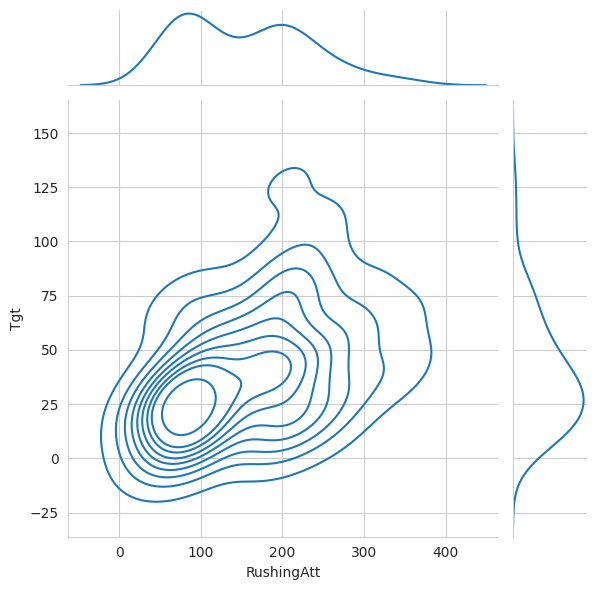

In [40]:
sns.jointplot(x=rb_df_filtered['RushingAtt'], y = rb_df_filtered['Tgt'], kind = 'kde', dropna= True)

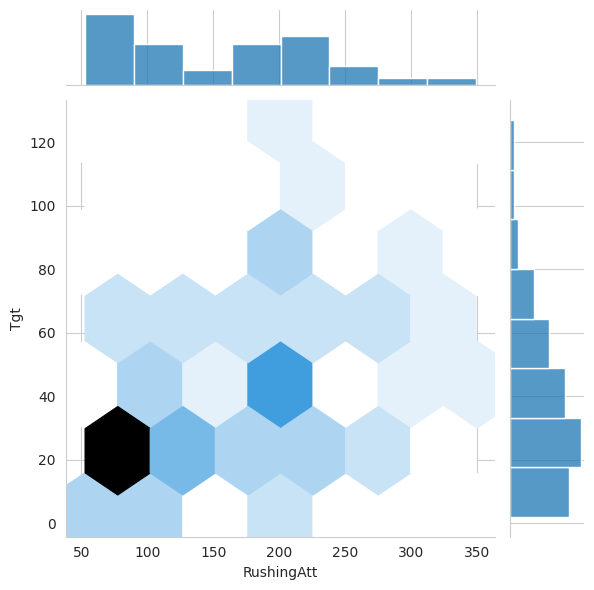

In [41]:
sns.jointplot(x=rb_df_filtered['RushingAtt'], y = rb_df_filtered['Tgt'], kind = 'hex', dropna= True)

Text(0, 0.5, 'Residual')

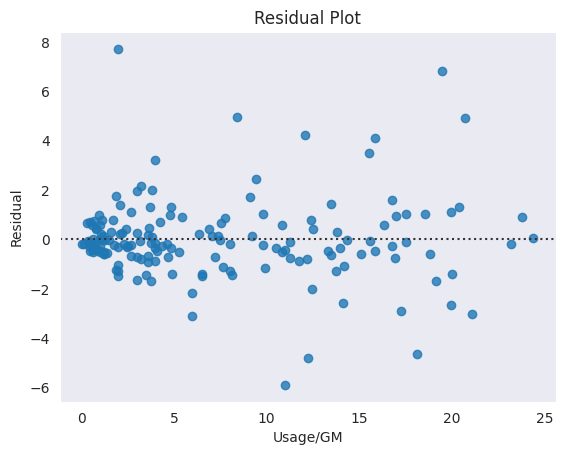

In [44]:
sns.set_style('dark') #lets change the style

sns.residplot(x=rb_df['Usage/G'], y = rb_df['FantasyPoints/G'])
plt.title('Residual Plot')
plt.xlabel('Usage/GM')
plt.ylabel('Residual')
#plt.show()


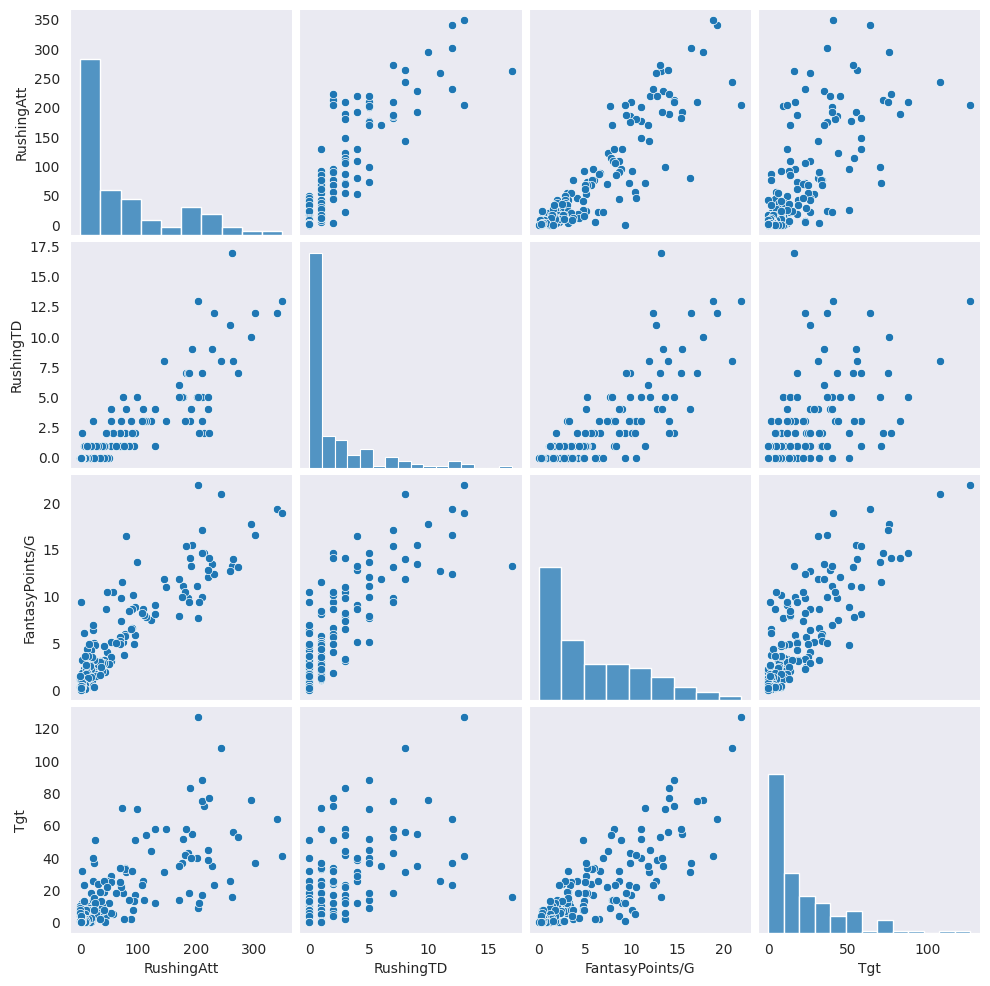

In [45]:
rb_df_copy = rb_df[[
    'RushingAtt',
    'RushingTD',
    'FantasyPoints/G',
    'Tgt'
]]

sns.pairplot(rb_df_copy);


In [46]:
weekly_df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/01-Weekly%20Fantasy%20Stats%20-%202022/weekly_df.csv')

weekly_df.head()


,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
0,00-0019596,Tom Brady,QB,TB,1,212,305,87,1,2,17,1,27,18,9,1.050854,0,2,-1,0,0,-1.437167,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,10.38,10.38,10.38
1,00-0019596,Tom Brady,QB,TB,2,190,318,81,1,1,2,0,34,18,8,2.428707,0,3,-2,0,0,-7.115407,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,9.40,9.40,9.40
2,00-0019596,Tom Brady,QB,TB,3,271,236,124,1,3,20,0,42,31,15,1.076749,0,1,-1,0,0,0.000000,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,14.74,14.74,14.74
3,00-0019596,Tom Brady,QB,TB,4,385,326,205,3,1,12,0,52,39,23,9.511334,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,25.40,25.40,25.40
4,00-0019596,Tom Brady,QB,TB,5,351,356,178,1,0,0,0,52,35,17,12.989590,1,3,-3,0,0,-3.336036,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,19.74,19.74,19.74


In [47]:
allen = weekly_df.loc[weekly_df['Player']=='Josh Allen']
mahomes = weekly_df.loc[weekly_df['Player']=='Patrick Mahomes']
wilson = weekly_df.loc[weekly_df['Player']=='Russell Wilson']


allen

,PlayerID,Player,Position,Tm,Week,PassingYds,PassingAirYards,PassingYAC,PassingTD,Sacks,SackYards,Int,PassingAtt,Cmp,PassingFirstDown,PassingEPA,Passing2PC,RushingAtt,RushingYds,RushingTD,RushingFirstDown,RushingEPA,Rushing2PC,Receptions,Targets,ReceivingYards,ReceivingTDs,ReceivingAirYards,ReceivingYAC,ReceivingFirstDown,ReceivingEPA,Receiving2PC,TargetShare,AirYardsShare,WOPR,SpecialTeamsTD,FumblesLost,StandardFantasyPoints,PPRFantasyPoints,HalfPPRFantasyPoints
2651,00-0034857,Josh Allen,QB,BUF,1,297,227,114,3,2,5,2,31,26,15,13.646458,0,10,56,1,4,5.867531,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,31.48,31.48,31.48
2652,00-0034857,Josh Allen,QB,BUF,2,317,279,97,4,1,4,0,38,26,13,16.223354,0,1,10,0,1,1.974729,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,29.68,29.68,29.68
2653,00-0034857,Josh Allen,QB,BUF,3,400,387,201,2,4,18,0,63,42,21,6.244458,0,8,47,0,5,4.694750,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,26.70,26.70,26.70
2654,00-0034857,Josh Allen,QB,BUF,4,213,259,102,1,1,12,1,36,19,14,2.057222,0,11,70,1,5,4.580851,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,23.52,23.52,23.52
2655,00-0034857,Josh Allen,QB,BUF,5,424,420,202,4,0,0,1,31,20,15,24.854641,0,5,42,0,2,2.863234,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,35.16,35.16,35.16
2656,00-0034857,Josh Allen,QB,BUF,6,329,295,120,3,1,11,0,40,27,18,11.160207,0,12,32,0,4,-4.504136,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,26.36,26.36,26.36
2657,00-0034857,Josh Allen,QB,BUF,8,218,321,87,2,2,2,2,25,13,8,0.610618,0,6,49,0,3,5.403737,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,17.62,17.62,17.62
2658,00-0034857,Josh Allen,QB,BUF,9,205,410,89,0,5,22,2,34,18,10,-12.699219,0,9,86,2,7,12.581272,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,24.80,24.80,24.80
2659,00-0034857,Josh Allen,QB,BUF,10,330,355,109,1,2,19,2,43,29,17,2.762026,0,6,84,0,4,-0.805198,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,1,19.60,19.60,19.60
2660,00-0034857,Josh Allen,QB,BUF,11,197,210,51,1,2,11,0,27,18,9,6.955731,0,3,7,0,1,-0.298523,0,0,0,0,0,0,0,0,NaN,0,NaN,NaN,NaN,0,0,12.58,12.58,12.58


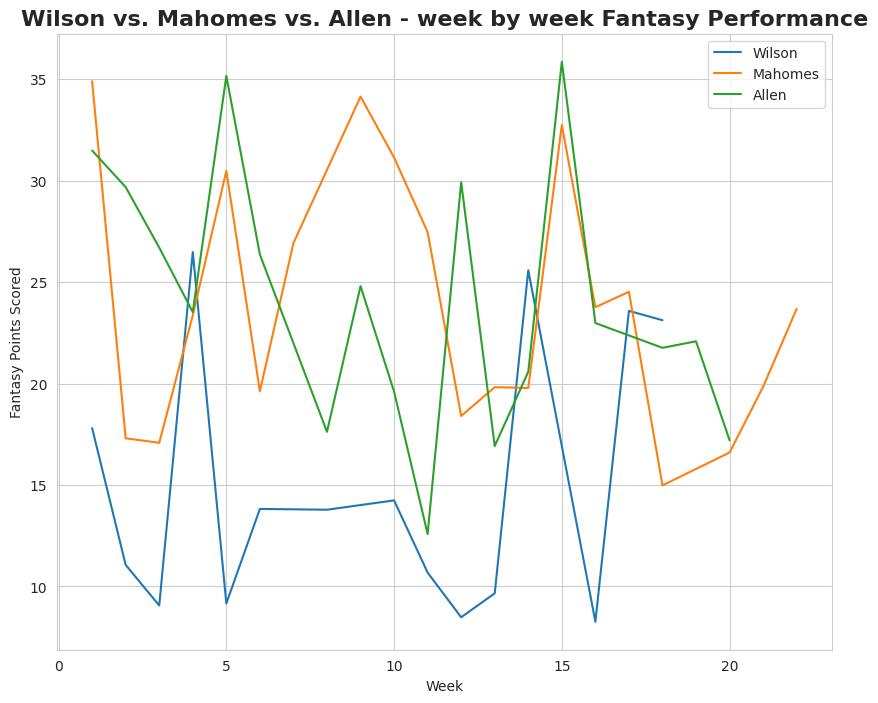

In [51]:
sns.set_style('whitegrid')
plt.subplots(figsize=(10,8))
plt.plot(wilson['Week'], wilson['StandardFantasyPoints'])
plt.plot(mahomes['Week'], mahomes['StandardFantasyPoints'])
plt.plot(allen['Week'], allen['StandardFantasyPoints'])
plt.legend(['Wilson', 'Mahomes', 'Allen'])
plt.xlabel('Week')
plt.ylabel('Fantasy Points Scored')
plt.title('Wilson vs. Mahomes vs. Allen - week by week Fantasy Performance', fontsize = 16, fontweight = 'bold')
plt.show()

<Axes: >

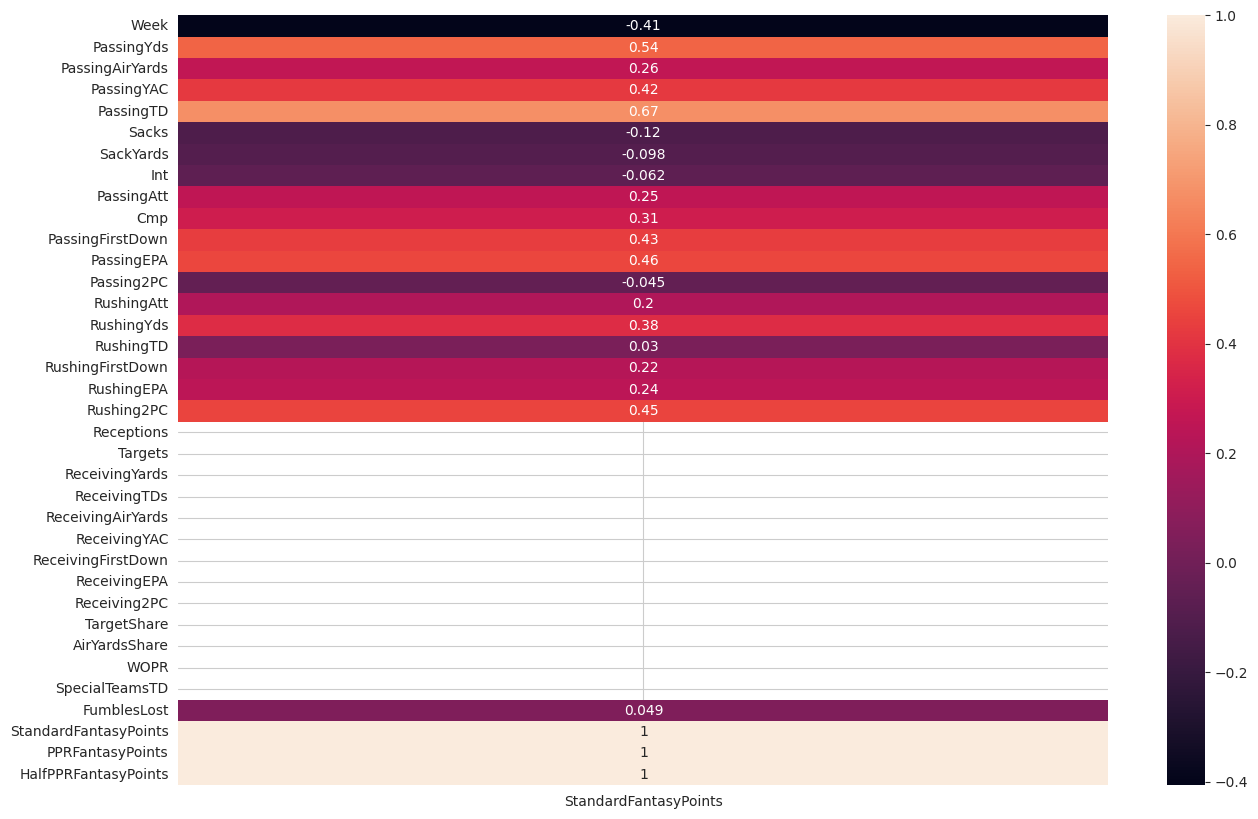

In [57]:
import numpy as np

plt.figure(figsize = (15,10))

numeric_data = allen.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr()[['StandardFantasyPoints']], annot=True)

In [58]:
print(allen.dtypes)

PlayerID                  object
Player                    object
Position                  object
Tm                        object
Week                       int64
PassingYds                 int64
PassingAirYards            int64
PassingYAC                 int64
PassingTD                  int64
Sacks                      int64
SackYards                  int64
Int                        int64
PassingAtt                 int64
Cmp                        int64
PassingFirstDown           int64
PassingEPA               float64
Passing2PC                 int64
RushingAtt                 int64
RushingYds                 int64
RushingTD                  int64
RushingFirstDown           int64
RushingEPA               float64
Rushing2PC                 int64
Receptions                 int64
Targets                    int64
ReceivingYards             int64
ReceivingTDs               int64
ReceivingAirYards          int64
ReceivingYAC               int64
ReceivingFirstDown         int64
ReceivingE

In [59]:
df = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/03-Yearly%20Fantasy%20Stats%20-%202022.csv').iloc[:, 1:]


df['Usage/G'] = (df['PassingAtt'] + df['Tgt'] + df['RushingAtt'])/df['G']
df['FantasyPoints/G'] = df['FantasyPoints'] / df['G']
df.head()

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,PassingCmp,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,Int,Fumbles,FumblesLost,2PM,2PP,FantasyPoints,Usage/G,FantasyPoints/G
0,Patrick Mahomes*+,KAN,QB,27,17,17,1,1,5250,41,648,435,358,4,61,6,0,12,5,0,1.0,2.0,417.4,41.764706,24.552941
1,Josh Jacobs*+,LVR,RB,24,17,17,64,53,0,0,0,0,1653,12,340,400,0,0,3,1,NaN,NaN,328.3,23.764706,19.311765
2,Christian McCaffrey*,2TM,RB,26,17,16,108,85,34,1,1,1,1139,8,244,741,5,0,1,0,NaN,NaN,356.4,20.764706,20.964706
3,Derrick Henry *,TEN,RB,28,16,16,41,33,4,1,2,2,1538,13,349,398,0,0,6,3,NaN,NaN,302.8,24.500000,18.925000
4,Justin Jefferson*+,MIN,WR,23,17,17,184,128,34,0,2,2,24,1,4,1809,8,0,0,0,1.0,NaN,368.7,11.176471,21.688235


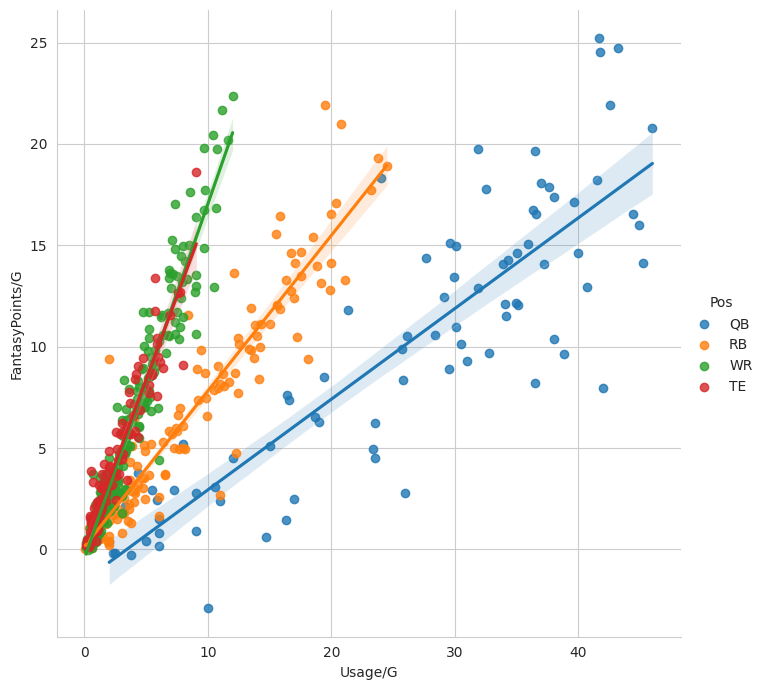

In [60]:
sns.lmplot(data=df, x='Usage/G', y='FantasyPoints/G', hue='Pos', height=7);


In [61]:
combine_df = pd.read_csv("https://raw.githubusercontent.com/fantasydatapros/LearnPythonWithFantasyFootball/master/2023/07-Data%20Visualizations/02-Combine%20Data%202000%20to%202023.csv")
combine_df.head()

,Year,DraftTeam,DraftRound,DraftOverallPick`,PFRPlayerID,CFBPlayerID,Player,Pos,School,Height,Weight,40YD,BenchReps,Vertical,BroadJump,3Cone,Shuttle
0,2000,New York Jets,1.0,13.0,AbraJo00,NaN,John Abraham,OLB,South Carolina,4-Jun,252.0,4.55,NaN,NaN,NaN,NaN,NaN
1,2000,Seattle Seahawks,1.0,19.0,AlexSh00,shaun-alexander-1,Shaun Alexander,RB,Alabama,Jun-00,218.0,4.58,NaN,NaN,NaN,NaN,NaN
2,2000,Kansas City Chiefs,6.0,188.0,AlfoDa20,NaN,Darnell Alford,OT,Boston Col.,4-Jun,334.0,5.56,23.0,25.0,94.0,8.48,4.98
3,2000,NaN,NaN,NaN,NaN,NaN,Kyle Allamon,TE,Texas Tech,2-Jun,253.0,4.97,NaN,29.0,104.0,7.29,4.49
4,2000,Carolina Panthers,1.0,23.0,AndeRa21,NaN,Rashard Anderson,CB,Jackson State,2-Jun,206.0,4.55,NaN,34.0,123.0,7.18,4.15


In [62]:
"""
Here, we groupby the column Pos, and then print out descriptive statistics for the data using the describe method.

Try messing with this code and repeating this process for other columns as well.

Documentation for groupby

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Documentation for describe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

"""

combine_df.groupby('Pos')['40YD'].describe()

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
C,175.0,5.232971,0.162464,4.83,5.1300,5.230,5.3350,5.84
CB,735.0,4.492830,0.093485,4.23,4.4300,4.490,4.5500,4.94
DB,55.0,4.531636,0.125812,4.31,4.4400,4.510,4.6150,4.85
DE,503.0,4.829066,0.141248,4.36,4.7400,4.830,4.9200,5.24
DL,104.0,4.976346,0.208014,4.52,4.8300,4.980,5.1400,5.46
DT,477.0,5.098700,0.164047,4.68,4.9800,5.080,5.2000,5.71
EDGE,50.0,4.690200,0.153057,4.36,4.5825,4.690,4.7900,5.08
FB,119.0,4.765966,0.138603,4.53,4.6650,4.740,4.8700,5.31
ILB,265.0,4.753774,0.121281,4.42,4.6600,4.750,4.8300,5.18


<ipython-input-63-8fb44d4a659a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pos', y='40YD', data=combine_df.loc[combine_df['Pos'].isin(['RB', 'QB', 'TE', 'WR'])], palette=sns.color_palette("husl", n_colors=4));


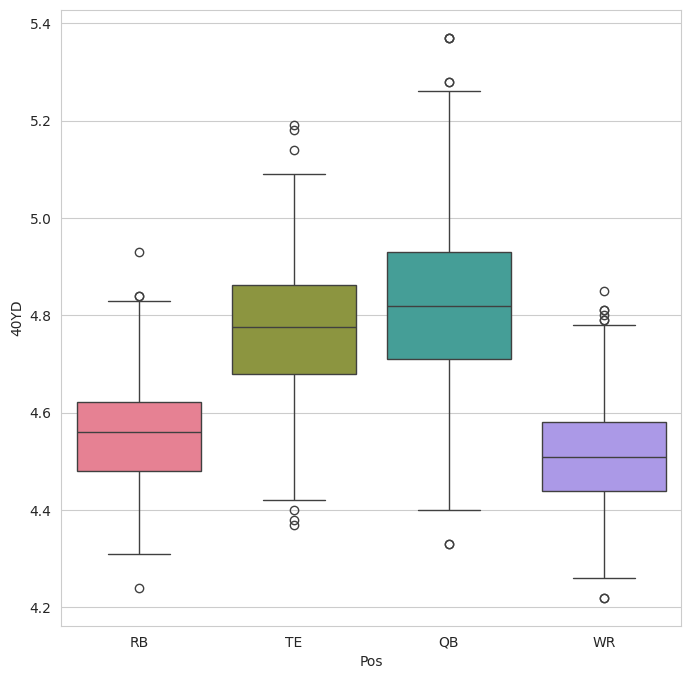

In [63]:
plt.figure(figsize=(8, 8))

"""

Information on how you can adjust the palette argument of this function
and all seaborn functions can be found here

https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

Essentially, you need to create a palette object using the color_palette function

"""
sns.boxplot(x='Pos', y='40YD', data=combine_df.loc[combine_df['Pos'].isin(['RB', 'QB', 'TE', 'WR'])], palette=sns.color_palette("husl", n_colors=4));